In [1]:
!pip install qiskit
!pip install qiskit-machine-learning
!pip install qiskit[visualization]
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 11.4 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=118277 sha256=d8df9cc250237818bc045f66d9f29cae5f8a0cc16781b0c4e11e0970d6e1b84f
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw
     ━━━━━━━━━━━━

In [2]:
from qiskit import *

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [4]:
import pandas as pd
import os

# Ganti 'path/to/your/file.csv' dengan path yang sesuai
file_path = '/kaggle/input/breast-cancer-wisconsin-data/data.csv'
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
print(df.head(5))


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

2. Data Cleaning & Wrangling (EDA)

In [8]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


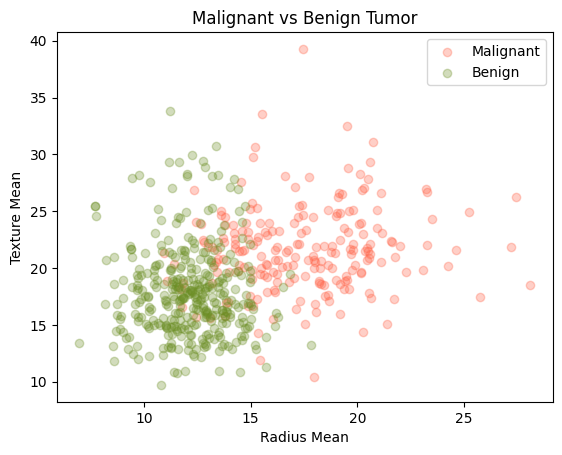

In [10]:
#plot outcome variable to see whether suitable for KNN Algorithm or not
M = df[df.diagnosis == "M"]
B = df[df.diagnosis == "B"]

import matplotlib.pyplot as plt
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "tomato", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "olivedrab", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [11]:
import numpy as np


df['diagnosis']=np.where(df['diagnosis']=='M',1,0)

In [12]:
#df.info() #'diagnosis' has changed to int64
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style("whitegrid")
# g=sns.PairGrid(df,hue='diagnosis')
# g.map_offdiag(plt.scatter)
# g.add_legend()
# plt.show()

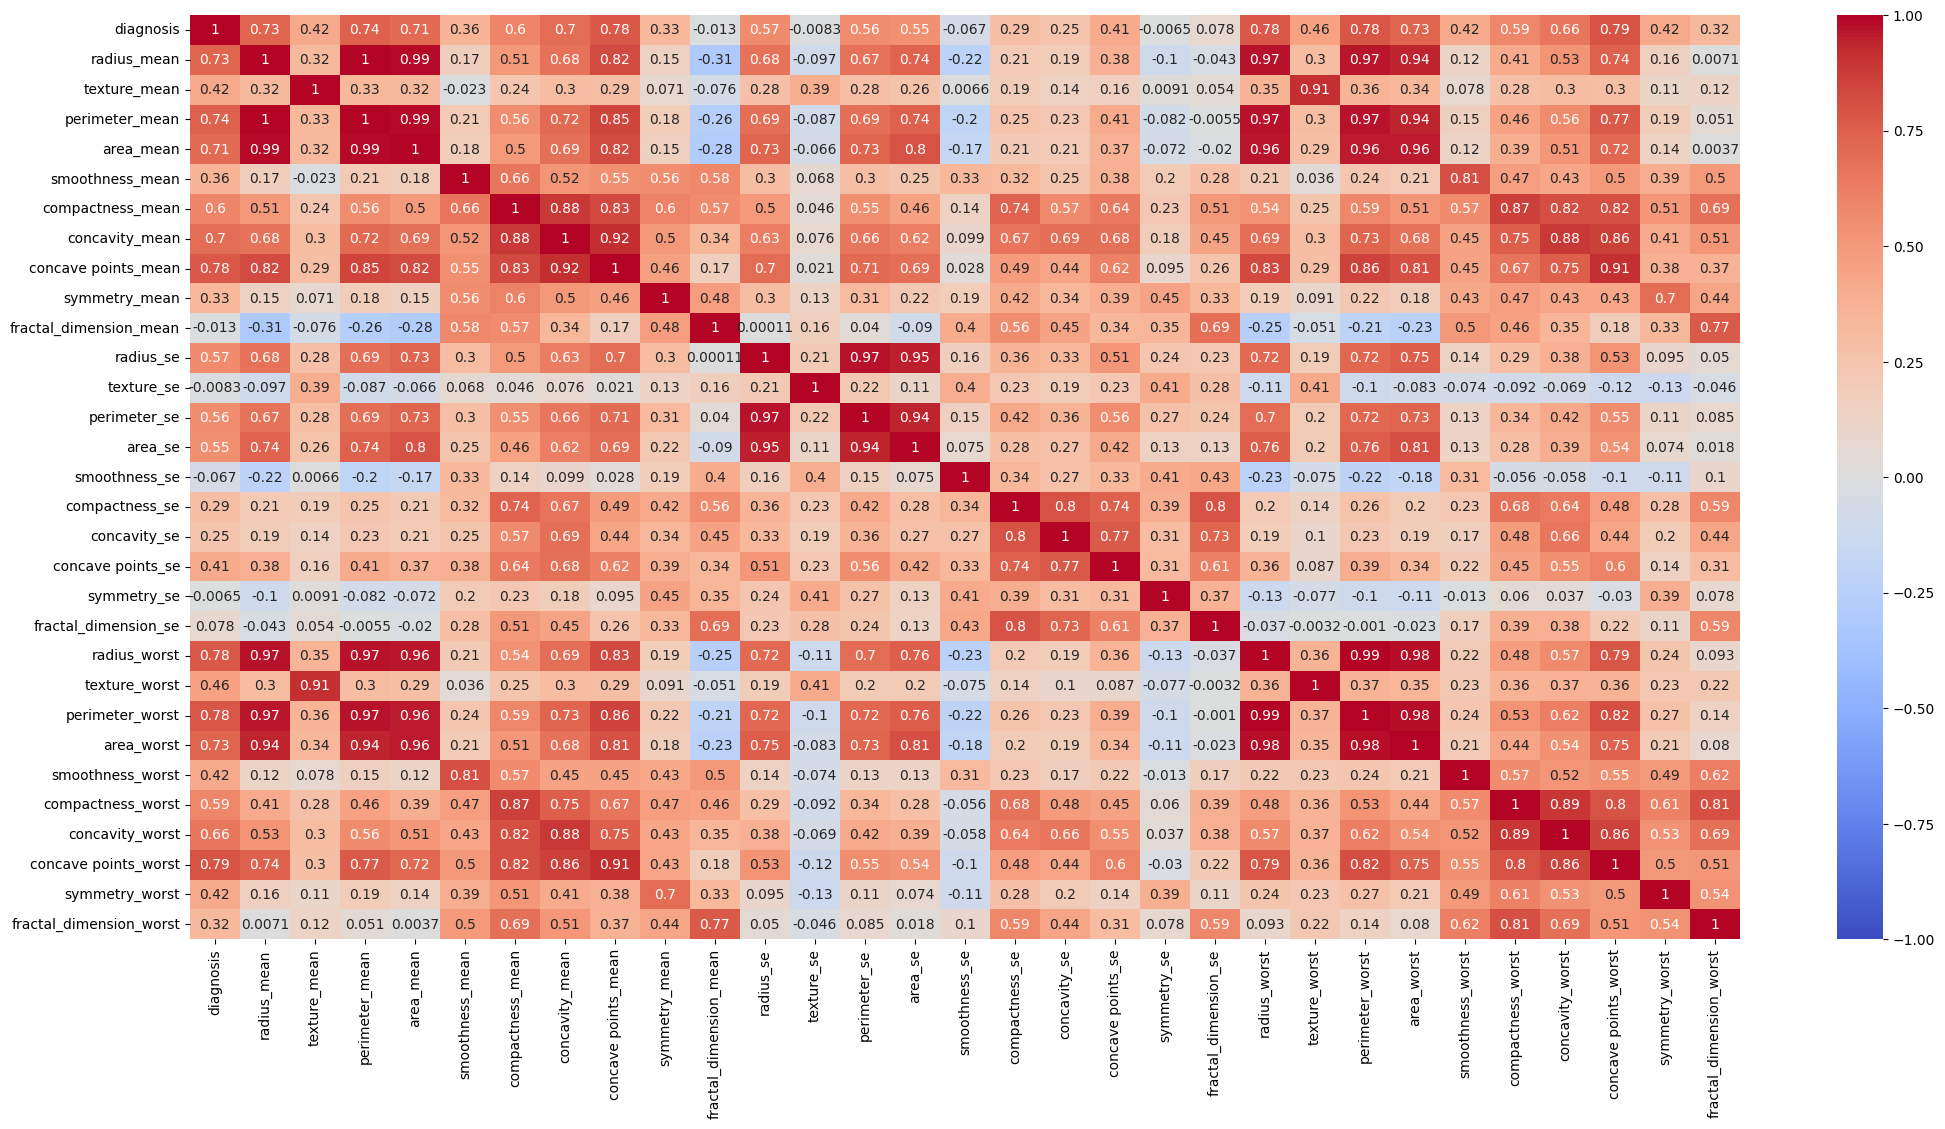

In [14]:
#df.corr()
#plot correlation heatmap
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True)
plt.show()

3. Build model - KNN model from Scikit-learn¶

In [15]:
#split the data into features X and label Y
#df.info()
X=df.iloc[:,1:30]
Y=df.iloc[:,0]

In [16]:
#select 3 data for prediction
X_new=X.iloc[200:203]
Y_new=Y.iloc[200:203]

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X,Y)
Y_predict1=knn1.predict(X_new)

print('Prediction Result:{}'.format(Y_predict1))
print('Actual Result:{}'.format(Y_new))

Prediction Result:[0 1 1]
Actual Result:200    0
201    1
202    1
Name: diagnosis, dtype: int64


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Asumsikan X dan Y sudah didefinisikan sebelumnya
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a classifier using Random Forest
rf_model = RandomForestClassifier(random_state=42)  # Anda bisa menambahkan parameter lain jika perlu
rf_model.fit(X_train, Y_train)

# Make predictions
Y_predict_rf = rf_model.predict(X_test)

# Print predictions
print("Test set predictions (Random Forest): {}".format(Y_predict_rf))

# Calculate accuracy
accuracy_rf = accuracy_score(Y_test, Y_predict_rf)
print(f'Accuracy (Random Forest): {accuracy_rf * 100:.2f}%')


Test set predictions (Random Forest): [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
Accuracy (Random Forest): 96.49%


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

knn2=KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train,Y_train)

Y_predict2=knn2.predict(X_test)
print("Test set predictions:{}".format(Y_predict2))

Test set predictions:[1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 0 1]


In [19]:
#Evaluation: accuracy
knn2.score(X_test, Y_test)

0.9298245614035088

In [20]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=3)
cv_results=cross_val_score(knn, X, Y, cv=5)
print(cv_results)

[0.87719298 0.92105263 0.94736842 0.93859649 0.91150442]


In [21]:
#Evaluation:The average accuracy rate of 5 test-train groups
print("The average accuracy rate is:{}".format(np.mean(cv_results)))

The average accuracy rate is:0.9191429902189101


4. Hyperparameter Tuning: Find out the optimal k

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_best_k=GridSearchCV(knn, param_grid, cv=5)

knn_best_k.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [23]:
knn_best_k.best_params_
print("Best parameter:",knn_best_k.best_params_)

Best parameter: {'n_neighbors': 14}


In [24]:
#the accuracy rate for the best k
knn_best_k.best_score_
print("Best score:",knn_best_k.best_score_)

Best score: 0.935010091600683


5. Classification Performance Metrics - Another way to evaluate the model: Confusion Matrix

In [25]:
#cross validation with confusion matrix
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=14) #use the best k we computed above
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
knn.fit(X_train,Y_train)
Y_predict3=knn.predict(X_test)
print(confusion_matrix(Y_test,Y_predict3))

[[71  0]
 [ 3 40]]


In [26]:
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=14)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
knn.fit(X_train,Y_train)
Y_predict3=knn.predict(X_test)
print(classification_report(Y_test,Y_predict3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



6. Feature Selection


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [29]:
# Encode target variable
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Split features and target
x_fs = df.drop(columns=['diagnosis'])
y_fs = df['diagnosis']

In [30]:
# Split data into training and testing sets
x_fs_train, x_fs_test, y_fs_train, y_fs_test = train_test_split(x_fs, y_fs, test_size=0.2, random_state=42)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=4)
X_train_selected = selector.fit_transform(x_fs_train, y_fs_train)
X_test_selected = selector.transform(x_fs_test)

# Train a classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_fs_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_fs_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display selected feature names
selected_features = x_fs.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Accuracy: 95.61%
Selected features: ['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']


In [31]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk hyperparameter tuning
param_grid_2={'n_neighbors':np.arange(1,50)}

# Mencari hyperparameter terbaik menggunakan GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid_2, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_fs_train)

# Menampilkan hyperparameter terbaik
print("Best hyperparameters: ", grid_search.best_params_)

# Menggunakan model dengan hyperparameter terbaik untuk membuat prediksi
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_selected)

# Menghitung akurasi
accuracy_knn = accuracy_score(y_fs_test, y_pred_knn)
print(f'Accuracy (KNN with Tuning): {accuracy_knn * 100:.2f}%')

# Menampilkan nama fitur yang terpilih
selected_features = x_fs.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())


Best hyperparameters:  {'n_neighbors': 33}
Accuracy (KNN with Tuning): 93.86%
Selected features: ['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']


In [32]:
dfq_x = df[['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']]

dfq_y = df['diagnosis']

print(dfq_x.head())
print(dfq_y.head())


   concave points_mean  radius_worst  perimeter_worst  concave points_worst
0              0.14710         25.38           184.60                0.2654
1              0.07017         24.99           158.80                0.1860
2              0.12790         23.57           152.50                0.2430
3              0.10520         14.91            98.87                0.2575
4              0.10430         22.54           152.20                0.1625
0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
dfq_x_scaled = scaler.fit_transform(dfq_x)

dfq_x_train, dfq_x_test, dfq_y_train, dfq_y_test = train_test_split(dfq_x_scaled, dfq_y, test_size=0.2, random_state=1)

print(f'X_train shape: {dfq_x_train.shape}')
print(f'X_test shape: {dfq_x_test.shape}')
print(f'Y_train shape: {dfq_y_train.shape}')
print(f'Y_test shape: {dfq_y_test.shape}')

X_train shape: (455, 4)
X_test shape: (114, 4)
Y_train shape: (455,)
Y_test shape: (114,)


In [34]:
dfq_x_train = np.array(dfq_x_train, dtype=float)
dfq_x_test = np.array(dfq_x_test, dtype=float)

In [35]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

def amplitude_encoding(features, num_qubits):
    """
    Encodes the features into quantum amplitude states.

    Args:
      features: Feature vector (1D array).
      num_qubits: Number of qubits to use in the quantum circuit.

    Returns:
      QuantumCircuit: Quantum circuit encoding the feature vector.
    """
    # Normalize the features
    norm = np.linalg.norm(features)
    normalized_features = features / norm
    normalized_features

    # Initialize quantum circuit
    qc = QuantumCircuit(num_qubits)
    qc.initialize(normalized_features, range(num_qubits))
    return qc


def encode_data(X, num_qubits):
    """
    Meng-encode seluruh data menjadi quantum statevector.
    """
    simulator = AerSimulator()
    encoded_data = []
    desired_length = 2**num_qubits

    for i in range(len(X)):
        features = X[i]  # Menggunakan indexing array numpy

        # Tambahkan padding jika panjang fitur kurang dari 2^n
        if len(features) < desired_length:
            padded_features = np.pad(features, (0, desired_length - len(features)))
        else:
            padded_features = features[:desired_length]

        # Encode fitur
        qc = amplitude_encoding(padded_features, num_qubits)
        qc.save_statevector()

        # Jalankan simulasi
        result = simulator.run(qc).result()
        statevector = result.get_statevector()

        encoded_data.append(statevector)

    return encoded_data

# Set jumlah qubit (bergantung pada jumlah fitur)
num_qubits = 2  #memiliki 4 fitur


In [36]:
# Encode data train dan test
x_train_encoded = encode_data(dfq_x_train, num_qubits)
x_test_encoded = encode_data(dfq_x_test, num_qubits)

In [37]:
# Gunakan hanya seluruh data
x_train_encoded = np.array(x_train_encoded, dtype=float)
y_train = np.array(dfq_y_train).ravel()

x_test_encoded = np.array(x_test_encoded, dtype=float)
y_test = np.array(dfq_y_test).ravel()

/opt/conda/lib/python3.10/site-packages/qiskit/quantum_info/states/statevector.py:110: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.array(self.data, dtype=dtype, copy=copy)


In [38]:
# Gunakan hanya 100 data pertama
x_train_encoded_100 = np.array(x_train_encoded[:100], dtype=float)
y_train_100 = np.array(dfq_y_train[:100]).ravel()  # Menggunakan bentuk satu dimensi

x_train_test_100 = np.array(x_test_encoded[:100], dtype=float)
y_test_100 = np.array(dfq_y_test[:100]).ravel()

In [39]:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQC
from qiskit.primitives import Sampler
from sklearn.model_selection import ParameterGrid
from qiskit_algorithms.optimizers import SPSA
import numpy as np

# Parameter grid untuk tuning
param_grid = {
    'feature_map_reps': [1, 2],
    'ansatz_reps': [1, 2],
    'maxiter': [100]
}

# Variabel untuk melacak hasil tuning dan nilai loss per parameter
best_score = 0
best_params = {}
tuning_results = []
loss_values_dict = {}  # Dictionary untuk menyimpan loss per parameter

# Melakukan grid search untuk kombinasi terbaik
for params in ParameterGrid(param_grid):
    feature_map = ZZFeatureMap(feature_dimension=4, reps=params['feature_map_reps'])
    ansatz = RealAmplitudes(num_qubits=4, reps=params['ansatz_reps'])

    # Sampler dan Optimizer
    sampler = Sampler()
    optimizer = SPSA(maxiter=params['maxiter'])

    # Callback untuk melacak loss
    loss_per_iteration = []
    def callback(weights, loss):
        print(f"Loss: {loss}")
        loss_per_iteration.append(loss)

    # Konfigurasi VQC
    vqc = VQC(
        num_qubits=4,
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=optimizer,
        sampler=sampler,
        callback=callback
    )

    # Latih model
    vqc.fit(x_train_encoded, y_train)

    # Evaluasi model pada data uji
    score = vqc.score(x_test_encoded, y_test)
    print(f"Params: {params}, Test Accuracy: {score}")

    # Simpan hasil tuning dan loss
    tuning_results.append({
        'feature_map_reps': params['feature_map_reps'],
        'ansatz_reps': params['ansatz_reps'],
        'maxiter': params['maxiter'],
        'test_accuracy': score
    })
    loss_values_dict[f"reps_{params['feature_map_reps']}_{params['ansatz_reps']}"] = loss_per_iteration

    # Simpan model terbaik
    if score > best_score:
        best_score = score
        best_params = params
        best_model = vqc

# Output: Akurasi terbaik dan prediksi model terbaik
print("Best Parameters:", best_params)
print("Best Test Accuracy:", best_score)
predictions = best_model.predict(x_test_encoded)
print("Predictions with Best Model:", predictions)


/tmp/ipykernel_17/232932808.py:27: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Loss: 0.9931289167172233
Loss: 1.0440021746807033
Loss: 1.0362848877948347
Loss: 0.9909124811247336
Loss: 1.0532808884201494
Loss: 0.9924636948967418
Loss: 1.025210383020697
Loss: 0.9911434153862327
Loss: 0.9928629226715004
Loss: 1.0545563281697627
Loss: 0.9931289167172234
Loss: 1.044002174680703
Loss: 1.0246990961728113
Loss: 0.993288908762606
Loss: 0.9923651737346023
Loss: 1.0619228365920867
Loss: 0.9928629226715004
Loss: 1.054556328169763
Loss: 0.9924636948967418
Loss: 1.0532808884201494
Loss: 1.036284887794835
Loss: 0.9909124811247336
Loss: 0.9913206002673337
Loss: 1.0538063164016407
Loss: 0.9931289167172234
Loss: 1.044002174680703
Loss: 0.9909124811247336
Loss: 1.036284887794835
Loss: 1.0649281004223814
Loss: 0.9900631636685627
Loss: 1.0246990961728113
Loss: 0.993288908762606
Loss: 1.061652218567933
Loss: 0.9921302332201353
Loss: 1.0252103830206971
Loss: 0.9911434153862326
Loss: 1.0440021746807033
Loss: 0.9931289167172233
Loss: 0.9911434153862327
Loss: 1.0252103830206971
Loss: 0.9

/tmp/ipykernel_17/232932808.py:27: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Loss: 1.1063471444986988
Loss: 1.0561670855325438
Loss: 1.1052638087033362
Loss: 1.0704346714300257
Loss: 1.1063471444986983
Loss: 1.0561670855325445
Loss: 1.0476665994767942
Loss: 1.0988984750179365
Loss: 1.0969780654010262
Loss: 1.0551059334803818
Loss: 1.1063471444986988
Loss: 1.0561670855325438
Loss: 1.0656955115293103
Loss: 1.0972038244822315
Loss: 1.0985968115710276
Loss: 1.0507612394739645
Loss: 1.0674765488271014
Loss: 1.1059332821158905
Loss: 1.0986669896195265
Loss: 1.0453264200256254
Loss: 1.096978065401026
Loss: 1.055105933480382
Loss: 1.0985968115710274
Loss: 1.050761239473965
Loss: 1.1052638087033366
Loss: 1.0704346714300252
Loss: 1.1052638087033364
Loss: 1.0704346714300255
Loss: 1.0797553911398738
Loss: 1.105069523032082
Loss: 1.1063471444986988
Loss: 1.0561670855325438
Loss: 1.1063413292528135
Loss: 1.069185325042289
Loss: 1.0704346714300255
Loss: 1.1052638087033364
Loss: 1.1063471444986988
Loss: 1.0561670855325438
Loss: 1.06569551152931
Loss: 1.0972038244822317
Loss: 1

/tmp/ipykernel_17/232932808.py:27: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Loss: 1.0399215567702944
Loss: 1.0062230369459484
Loss: 1.0941550202445611
Loss: 1.070254771335904
Loss: 0.9949979753477075
Loss: 1.1603686000949403
Loss: 1.18023992774181
Loss: 1.0137913216412604
Loss: 1.056182892561063
Loss: 1.0303515715920313
Loss: 1.050807608072408
Loss: 1.0511229003818374
Loss: 1.132650929033863
Loss: 0.9739652873601516
Loss: 0.9728072754057167
Loss: 1.1636002521305797
Loss: 1.044437234005054
Loss: 1.0561499122758802
Loss: 1.006223036945949
Loss: 1.039921556770294
Loss: 0.9946594190409478
Loss: 1.142169690058268
Loss: 1.040686921231076
Loss: 1.041029637165419
Loss: 1.0473396418108865
Loss: 1.0164362178918684
Loss: 0.9751982869841096
Loss: 1.1209086443269147
Loss: 1.0314571550475835
Loss: 1.0655150992821685
Loss: 1.0521467650364311
Loss: 1.030575559156359
Loss: 1.047796442171824
Loss: 1.0298913681877668
Loss: 1.054236101409051
Loss: 1.0208049066514926
Loss: 1.0423278119424046
Loss: 1.0492045169012765
Loss: 1.065104432583823
Loss: 0.9794544164182473
Loss: 1.15312404

/tmp/ipykernel_17/232932808.py:27: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Loss: 1.0913529671740945
Loss: 1.0890708174067234
Loss: 1.141924989847385
Loss: 1.1284086229634203
Loss: 1.0945829626740966
Loss: 1.11865913425121
Loss: 1.1324388441682813
Loss: 1.1023256000685073
Loss: 1.1219746307817684
Loss: 1.1245367425595465
Loss: 1.1180647682434786
Loss: 1.0894170766645985
Loss: 1.1196465179388235
Loss: 1.1003410743687987
Loss: 1.1110687846843053
Loss: 1.0789708566143463
Loss: 1.1236167141715758
Loss: 1.0938296433573733
Loss: 1.0887387677036695
Loss: 1.1190665584474937
Loss: 1.1099382559575974
Loss: 1.0982094600740078
Loss: 1.1232225569339847
Loss: 1.0927834137498387
Loss: 1.1010507699557495
Loss: 1.130981528058298
Loss: 1.1011638577208824
Loss: 1.0973756055003465
Loss: 1.107120558134387
Loss: 1.1147550487850408
Loss: 1.0840185727976912
Loss: 1.1214437649553695
Loss: 1.1028761826985887
Loss: 1.0695925542676925
Loss: 1.1000074531669715
Loss: 1.1163604190596743
Loss: 1.0951844436137264
Loss: 1.148321981408255
Loss: 1.1064336166487092
Loss: 1.117373618386637
Loss: 1

In [40]:
import pandas as pd

# Tampilkan hasil tuning dalam bentuk DataFrame
tuning_results_df = pd.DataFrame(tuning_results)
print("\nTuning Results:")
print(tuning_results_df)

# Output: Prediksi dari model terbaik
print("Predictions with Best Model:", predictions)



Tuning Results:
   feature_map_reps  ansatz_reps  maxiter  test_accuracy
0                 1            1      100       0.692982
1                 2            1      100       0.666667
2                 1            2      100       0.728070
3                 2            2      100       0.745614
Predictions with Best Model: [0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 1]


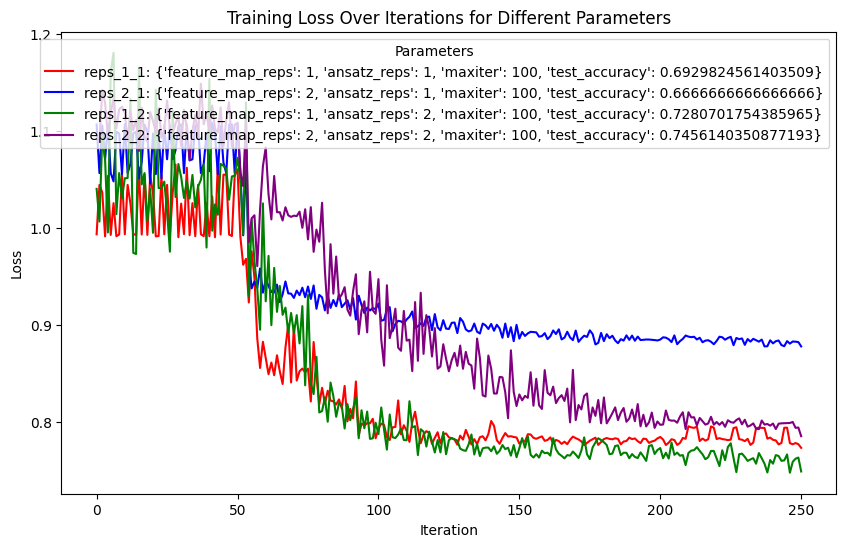

In [41]:
import matplotlib.pyplot as plt

# Visualisasi Loss untuk setiap kombinasi parameter
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple']  # Pilihan warna untuk tiap parameter
for i, (label, losses) in enumerate(loss_values_dict.items()):
    plt.plot(losses, label=f"{label}: {tuning_results[i]}", color=colors[i])

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations for Different Parameters')
plt.legend(title='Parameters')
plt.show()


In [42]:
# # Kode Keempat: Tabel Akurasi dari Setiap Kombinasi Parameter dengan Warna Konsisten

# # Buat tabel akurasi dengan warna yang sama seperti di grafik loss
# fig, ax = plt.subplots(figsize=(10, 6))

# # Menampilkan tabel akurasi dengan warna yang sesuai
# colors = ['red', 'blue', 'green', 'purple']  # Warna yang sama dengan grafik loss
# tuning_results_df['color'] = colors[:len(tuning_results_df)]  # Tambahkan warna ke DataFrame

# # Buat tabel dari DataFrame dan sesuaikan warna berdasarkan parameter kombinasi
# table = ax.table(
#     cellText=tuning_results_df[['feature_map_reps', 'ansatz_reps', 'test_accuracy']].values,
#     colLabels=['Feature Map Reps', 'Ansatz Reps', 'Test Accuracy'],
#     cellColours=[[c] * 3 for c in tuning_results_df['color']],  # Terapkan warna pada tiap baris
#     cellLoc='center',
#     loc='center'
# )

# # Format tampilan tabel
# table.auto_set_font_size(False)
# table.set_fontsize(10)
# table.scale(1.2, 1.2)  # Skala tabel agar lebih mudah dibaca
# ax.axis('off')  # Sembunyikan sumbu di sekitar tabel

# plt.title('Accuracy Table for Each Model with Consistent Colors')
# plt.show()


In [43]:
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.utils import algorithm_globals
import numpy as np

# Set seed for reproducibility
algorithm_globals.random_seed = 12345

# Definisikan grid parameter untuk tuning manual
C_values = [1, 10]  # Nilai regulasi SVM hanya 1 dan 10
feature_map_reps = [1, 2]  # Repetisi pada feature map

# Variabel untuk melacak hasil tuning
best_score = 0
best_params = {}
best_model = None
tuning_results = []

# Loop manual untuk mencari parameter terbaik
for C in C_values:
    for reps in feature_map_reps:
        # Buat feature map dengan jumlah reps yang bervariasi
        feature_map = ZZFeatureMap(feature_dimension=4, reps=reps)

        # Buat quantum kernel dengan feature map tersebut
        quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

        # Buat model QSVC dengan quantum kernel dan nilai C
        qsvc = QSVC(quantum_kernel=quantum_kernel, C=C)

        # Latih model pada data pelatihan
        qsvc.fit(x_train_encoded, y_train)

        # Evaluasi model pada data uji
        score = qsvc.score(x_test_encoded, y_test)
        print(f"Parameters: C={C}, reps={reps} => Test Accuracy: {score}")

        # Simpan hasil tuning
        tuning_results.append({
            'C': C,
            'feature_map_reps': reps,
            'test_accuracy': score
        })

        # Simpan model dan parameter jika akurasi lebih baik
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'feature_map_reps': reps}
            best_model = qsvc

# Output: Best Parameters, Best Test Accuracy, and Predictions
print("Best Parameters:", best_params)
print("Best Test Accuracy:", best_score)

# Prediksi dengan model terbaik
predictions_best = best_model.predict(x_test_encoded)
print("Predictions with Best Model:", predictions_best)


Parameters: C=1, reps=1 => Test Accuracy: 0.9122807017543859
Parameters: C=1, reps=2 => Test Accuracy: 0.868421052631579
Parameters: C=10, reps=1 => Test Accuracy: 0.9122807017543859
Parameters: C=10, reps=2 => Test Accuracy: 0.8508771929824561
Best Parameters: {'C': 1, 'feature_map_reps': 1}
Best Test Accuracy: 0.9122807017543859
Predictions with Best Model: [0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0]


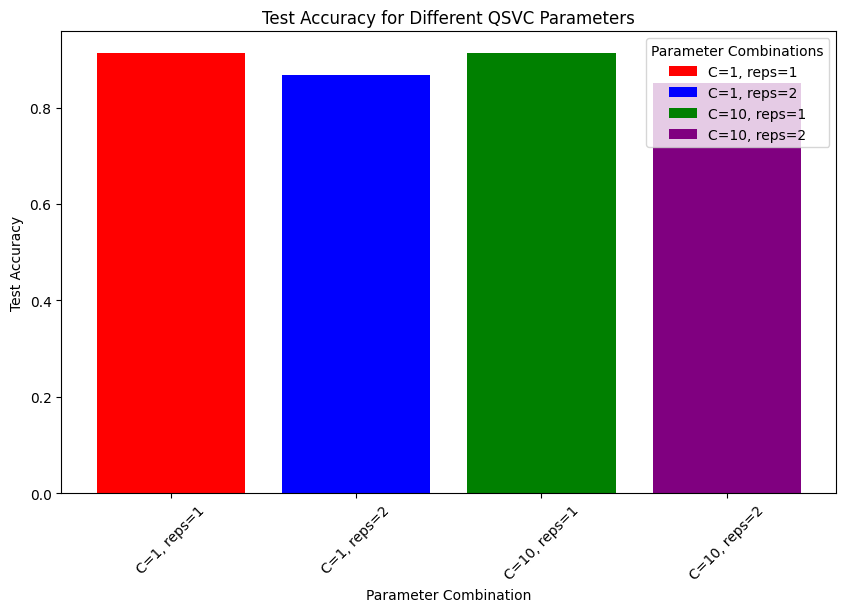

In [44]:
# Visualisasi Hasil Tuning dengan warna berbeda
import matplotlib.pyplot as plt
import pandas as pd

# Konversi tuning_results ke DataFrame
tuning_results_df = pd.DataFrame(tuning_results)

# Visualisasi Hasil Tuning
plt.figure(figsize=(10, 6))

# Pilihan warna untuk tiap kombinasi parameter
colors = ['red', 'blue', 'green', 'purple']

# Loop untuk plot akurasi tiap parameter dengan warna berbeda
for i, (C, reps) in enumerate(zip(tuning_results_df['C'], tuning_results_df['feature_map_reps'])):
    score = tuning_results_df.loc[(tuning_results_df['C'] == C) & (tuning_results_df['feature_map_reps'] == reps), 'test_accuracy'].values[0]
    plt.bar(f"C={C}, reps={reps}", score, color=colors[i % len(colors)], label=f"C={C}, reps={reps}")

# Menambahkan label dan judul
plt.xlabel('Parameter Combination')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different QSVC Parameters')
plt.xticks(rotation=45)
plt.legend(title="Parameter Combinations")
plt.show()


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.utils import algorithm_globals
import numpy as np
import pandas as pd

# Set seed for reproducibility
algorithm_globals.random_seed = 12345

# Definisikan feature map
num_qubits = 4  # Jumlah qubit sesuai kebutuhan
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2)

# Buat quantum kernel
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Definisikan parameter grid untuk tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Contoh nilai C yang ingin diuji
    'kernel': ['precomputed']  # Kernel yang digunakan
}

# Buat model SVC
svc = SVC()

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2)

# Hitung kernel matrix untuk data pelatihan
kernel_matrix = quantum_kernel.evaluate(x_train_encoded)  # Menghitung kernel matrix

# Fit model dengan kernel matrix
grid_search.fit(kernel_matrix, y_train)

# Tampilkan parameter terbaik dan akurasi terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Test Accuracy:", grid_search.best_score_)

# # Prediksi dengan model terbaik
# best_svc = grid_search.best_estimator_
# test_kernel_matrix = quantum_kernel.evaluate(x_test_encoded)  # Hitung kernel matrix untuk data uji
# predictions = best_svc.predict(test_kernel_matrix)
# print("Predictions:", predictions)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ...........................C=10, kernel=precomputed; total time=   0.0s
[CV] END ...........................C=10, kernel=

In [46]:
# Tampilkan hasil tuning dalam bentuk dataframe
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nHyperparameter Tuning Results:")
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])



Hyperparameter Tuning Results:
                                params  mean_test_score  std_test_score  \
0  {'C': 0.1, 'kernel': 'precomputed'}         0.832967        0.018906   
1    {'C': 1, 'kernel': 'precomputed'}         0.927473        0.038446   
2   {'C': 10, 'kernel': 'precomputed'}         0.912088        0.050597   
3  {'C': 100, 'kernel': 'precomputed'}         0.894505        0.036513   

   rank_test_score  
0                4  
1                1  
2                2  
3                3  


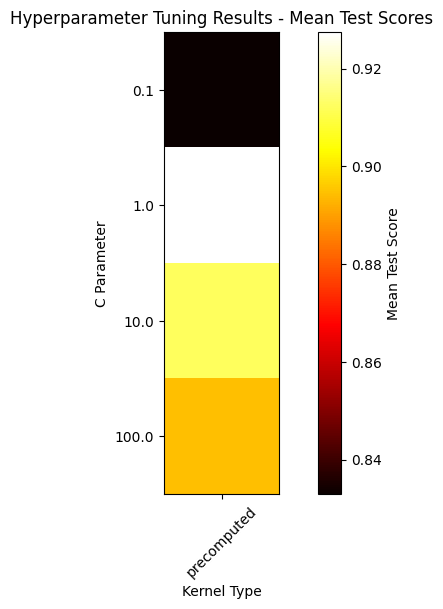

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Tampilkan hasil tuning dalam bentuk dataframe
results_df = pd.DataFrame(grid_search.cv_results_)

# Ekstrak parameter ke dalam kolom terpisah
results_df['C'] = results_df['params'].apply(lambda x: x['C'])
results_df['reps'] = results_df['params'].apply(lambda x: x['kernel'])  # Gantilah dengan parameter yang sesuai

# Visualisasi hasil tuning
plt.figure(figsize=(10, 6))

# Pivot dataframe untuk mendapatkan format yang tepat
scores_matrix = results_df.pivot_table(index='C', columns='reps', values='mean_test_score')

# Plot heatmap dari skor akurasi
plt.imshow(scores_matrix, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar(label='Mean Test Score')
plt.xlabel('Kernel Type')
plt.ylabel('C Parameter')
plt.title('Hyperparameter Tuning Results - Mean Test Scores')
plt.xticks(np.arange(len(scores_matrix.columns)), scores_matrix.columns, rotation=45)
plt.yticks(np.arange(len(scores_matrix.index)), scores_matrix.index)
plt.show()


**# DIATAS IKI SING WES FIX**

In [48]:
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.algorithms import VQC
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA

In [49]:
ansatz = RealAmplitudes(num_qubits=4, reps=1)  # num_qubits sesuai dengan jumlah fitur


In [50]:
sampler = Sampler()
optimizer = COBYLA(maxiter=100)

/tmp/ipykernel_17/301875841.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [51]:
vqc = VQC(feature_map=None, ansatz=ansatz, optimizer=optimizer, sampler=sampler)


In [52]:
import numpy as np
encoded_X_train = np.array(encoded_X_train, dtype=float)
encoded_X_train.shape


NameError: name 'encoded_X_train' is not defined

In [ ]:
# y_train_coba = y_train
y_train_coba = np.array(dfq_y_train)
# y_train_coba =  y_train.values
y_train_coba = y_train_coba.reshape(-1, 1)

y_train_coba.shape


In [ ]:
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.algorithms import VQC
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA

ansatz = RealAmplitudes(num_qubits=4, reps=1)  # num_qubits sesuai dengan jumlah fitur

sampler = Sampler()
optimizer = COBYLA(maxiter=100)

vqc = VQC(feature_map=None, ansatz=ansatz, optimizer=optimizer, sampler=sampler)

In [ ]:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQC
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import SPSA
import numpy as np

# Gunakan seluruh data pelatihan
encoded_X_train_full = np.array(encoded_X_train, dtype=float)  # Seluruh data X_train
y_train_full = np.array(y_train_coba).ravel()  # Seluruh target y_train

# Gunakan seluruh data uji
encoded_X_test_full = np.array(encoded_X_test, dtype=float)
dfq_y_test_full = np.array(dfq_y_test).ravel()

# Konfigurasi Feature Map, Ansatz, dan Optimizer dengan parameter terbaik
feature_map = ZZFeatureMap(feature_dimension=4, reps=2)  # 'feature_map_reps': 2
ansatz = RealAmplitudes(num_qubits=4, reps=2)  # 'ansatz_reps': 2
optimizer = SPSA(maxiter=100)  # 'maxiter': 100

# Sampler dan callback
sampler = Sampler()
def callback(weights, loss):
    print(f"Loss: {loss}")

# Konfigurasi VQC dengan parameter terbaik
vqc_best = VQC(
    num_qubits=4,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    sampler=sampler,
    callback=callback
)

# Latih model dengan seluruh data
vqc_best.fit(encoded_X_train_full, y_train_full)

# Evaluasi model pada seluruh data uji
best_score_full = vqc_best.score(encoded_X_test_full, dfq_y_test_full)
print(f"Test Accuracy with Full Data: {best_score_full}")

# Prediksi dengan seluruh data uji
predictions_full = vqc_best.predict(encoded_X_test_full)
print("Predictions with Full Data:", predictions_full)


In [ ]:
# import numpy as np

# # Fit model dengan data subset
# vqc.fit(encoded_X_train, y_train_coba)

# # Evaluate model
# encoded_X_test_coba = np.array(encoded_X_test, dtype=float)

# score = vqc.score(encoded_X_test_coba, dfq_y_test)
# print(f"Test Accuracy: {score}")

# # predictions
# predictions = vqc.predict(encoded_X_test_coba)
# print("Predictions:", predictions)

In [ ]:
# from sklearn.metrics import log_loss

# cross_entropy_loss = log_loss(dfq_y_test, predictions)
# print("Cross Entropy Loss:", cross_entropy_loss)

In [ ]:
from qiskit_algorithms.utils import algorithm_globals  # Import from the correct location
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC

algorithm_globals.random_seed = 12345

# Create a quantum kernel using the sampler
quantum_kernel = FidelityQuantumKernel(feature_map=None)

# Create the QSVC model with the quantum kernel
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Train the QSVC model
qsvc.fit(encoded_X_train, y_train_coba)

# Evaluate the model
qsvc_score = qsvc.score(encoded_X_test_coba, dfq_y_test)
print(f"QSVC Test Accuracy: {qsvc_score}")

# Make predictions
qsvc_predictions = qsvc.predict(encoded_X_test_coba)
print("QSVC Predictions:", qsvc_predictions)